# One period

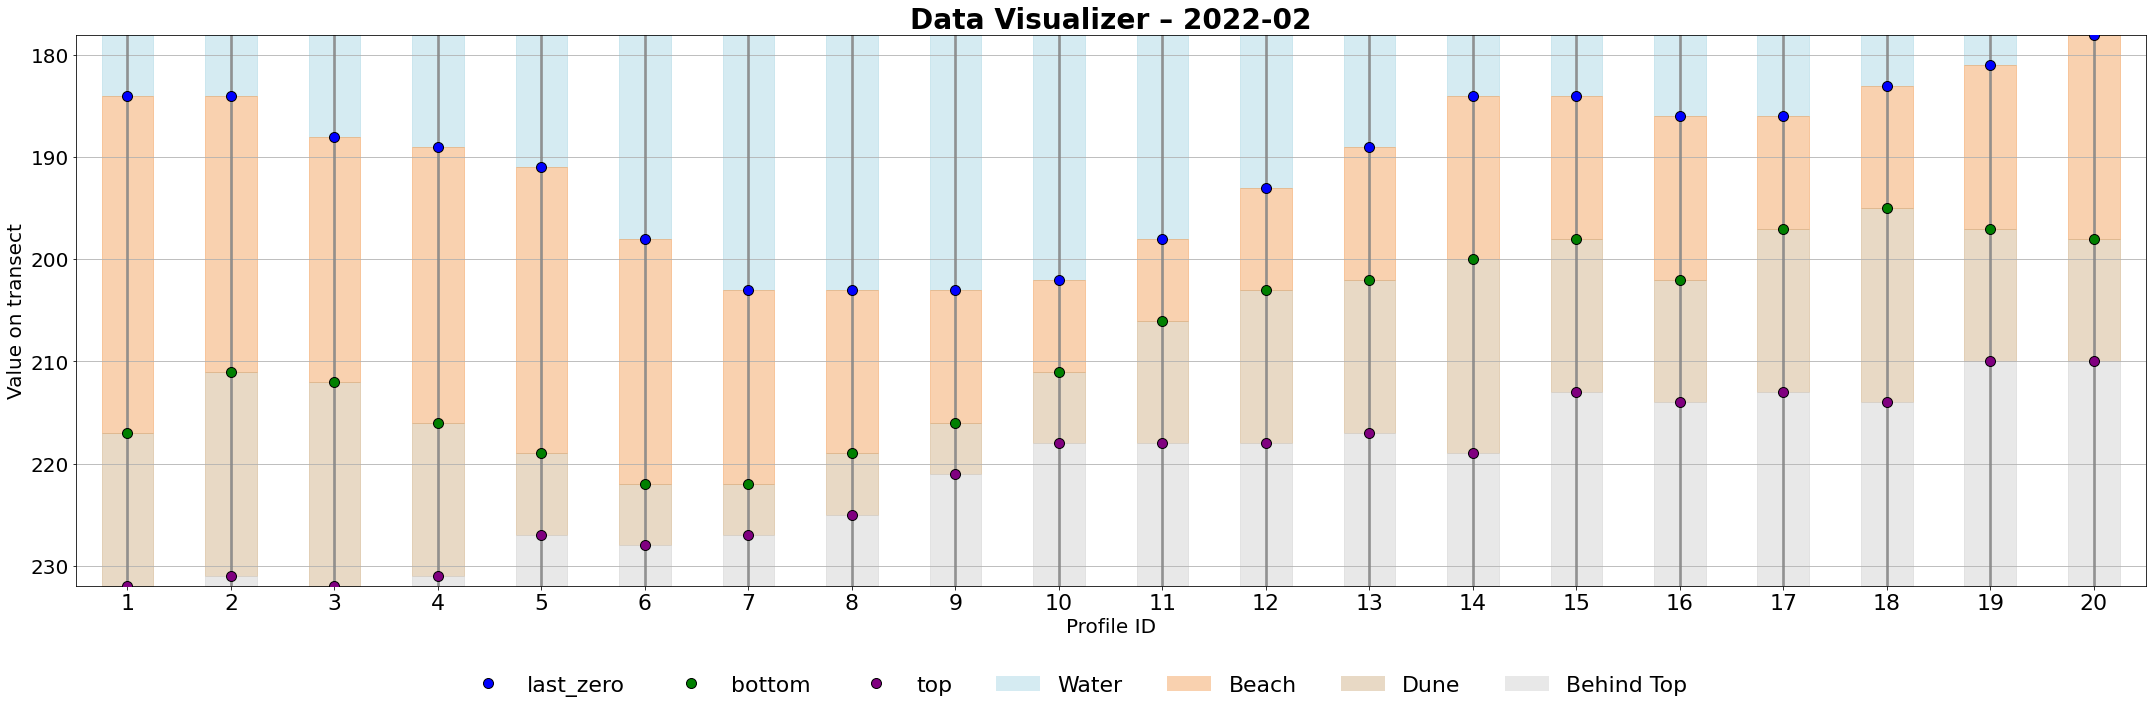

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import os

# PATH
FOLDER = '../demo/2022-02'  
OUTPUT_FOLDER = '../demo/data-visualiser'
CSV_PATH = os.path.join(FOLDER, 'output', 'finder', 'finder.csv')
OUTPUT_FILENAME = f"data-vis_{os.path.basename(FOLDER)}.jpg"

data = pd.read_csv(CSV_PATH)

# FIGURE
fig, ax = plt.subplots(figsize=(30, 10))

profile_ids = data['profile_id'].unique()

colors = {
    'last_zero': 'blue',
    'bottom': 'green',
    'top': 'purple'
}

spacing_factor = 0.5 #distance between profiles  
bar_width = spacing_factor / 1 # bar width
x_values = [i for i in range(len(profile_ids))]

min_value = data[['last_zero', 'bottom', 'top']].min().min()
max_value = data[['last_zero', 'bottom', 'top']].max().max()

y_min = min_value
y_max = max_value


for i, profile_id in enumerate(profile_ids):
    subset = data[data['profile_id'] == profile_id]
    x = x_values[i]

    last_zero_y = subset['last_zero'].values[0]
    bottom_y = subset['bottom'].values[0]
    top_y = subset['top'].values[0]

    ax.plot([x, x], [y_min, y_max], color='gray', linestyle='-', linewidth=3, alpha=0.7)
    ax.scatter(x, last_zero_y, color=colors['last_zero'], edgecolor='black', s=100, zorder=3)
    ax.scatter(x, bottom_y, color=colors['bottom'], edgecolor='black', s=100, zorder=3)
    ax.scatter(x, top_y, color=colors['top'], edgecolor='black', s=100, zorder=3)

    ax.fill_betweenx([y_min, last_zero_y], x - bar_width/2, x + bar_width/2, color='lightblue', alpha=0.5)
    ax.fill_betweenx([last_zero_y, bottom_y], x - bar_width/2, x + bar_width/2, color='#F4A460', alpha=0.5)
    ax.fill_betweenx([bottom_y, top_y], x - bar_width/2, x + bar_width/2, color='#D2B48C', alpha=0.5)
    ax.fill_betweenx([top_y, y_max], x - bar_width/2, x + bar_width/2, color='lightgrey', alpha=0.5)

# FIGURE PARAMETERS
ax.set_xticks(x_values)
ax.set_xlabel('Profile ID', fontsize=20)
ax.set_ylabel('Value on transect', fontsize=20)
ax.set_title(f'Data Visualizer – {os.path.basename(FOLDER)}', fontsize=28, fontweight='bold')
ax.set_xticklabels(profile_ids, rotation=0, ha='center', fontsize=22)
ax.tick_params(axis='y', labelsize=20)
ax.set_ylim(y_min, y_max)
ax.set_xlim(min(x_values) - bar_width, max(x_values) + bar_width)
ax.invert_yaxis()
ax.grid(True)


legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='last_zero', markerfacecolor='blue', markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='bottom', markerfacecolor='green', markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='top', markerfacecolor='purple', markersize=10, markeredgecolor='black'),
    Patch(facecolor='lightblue', label='Water', alpha=0.5),
    Patch(facecolor='#F4A460', label='Beach', alpha=0.5),
    Patch(facecolor='#D2B48C', label='Dune', alpha=0.5),
    Patch(facecolor='lightgrey', label='Behind Top', alpha=0.5)
]

fig.legend(handles=legend_elements, title='', fontsize=22, title_fontsize=22,
           loc='lower center', bbox_to_anchor=(0.5, 0), ncol=7, frameon=False)

plt.tight_layout()
plt.subplots_adjust(bottom=0.18)  

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
output_path = os.path.join(OUTPUT_FOLDER, OUTPUT_FILENAME)
plt.savefig(output_path, dpi=150)
plt.show()


# Data compare for 2 period 

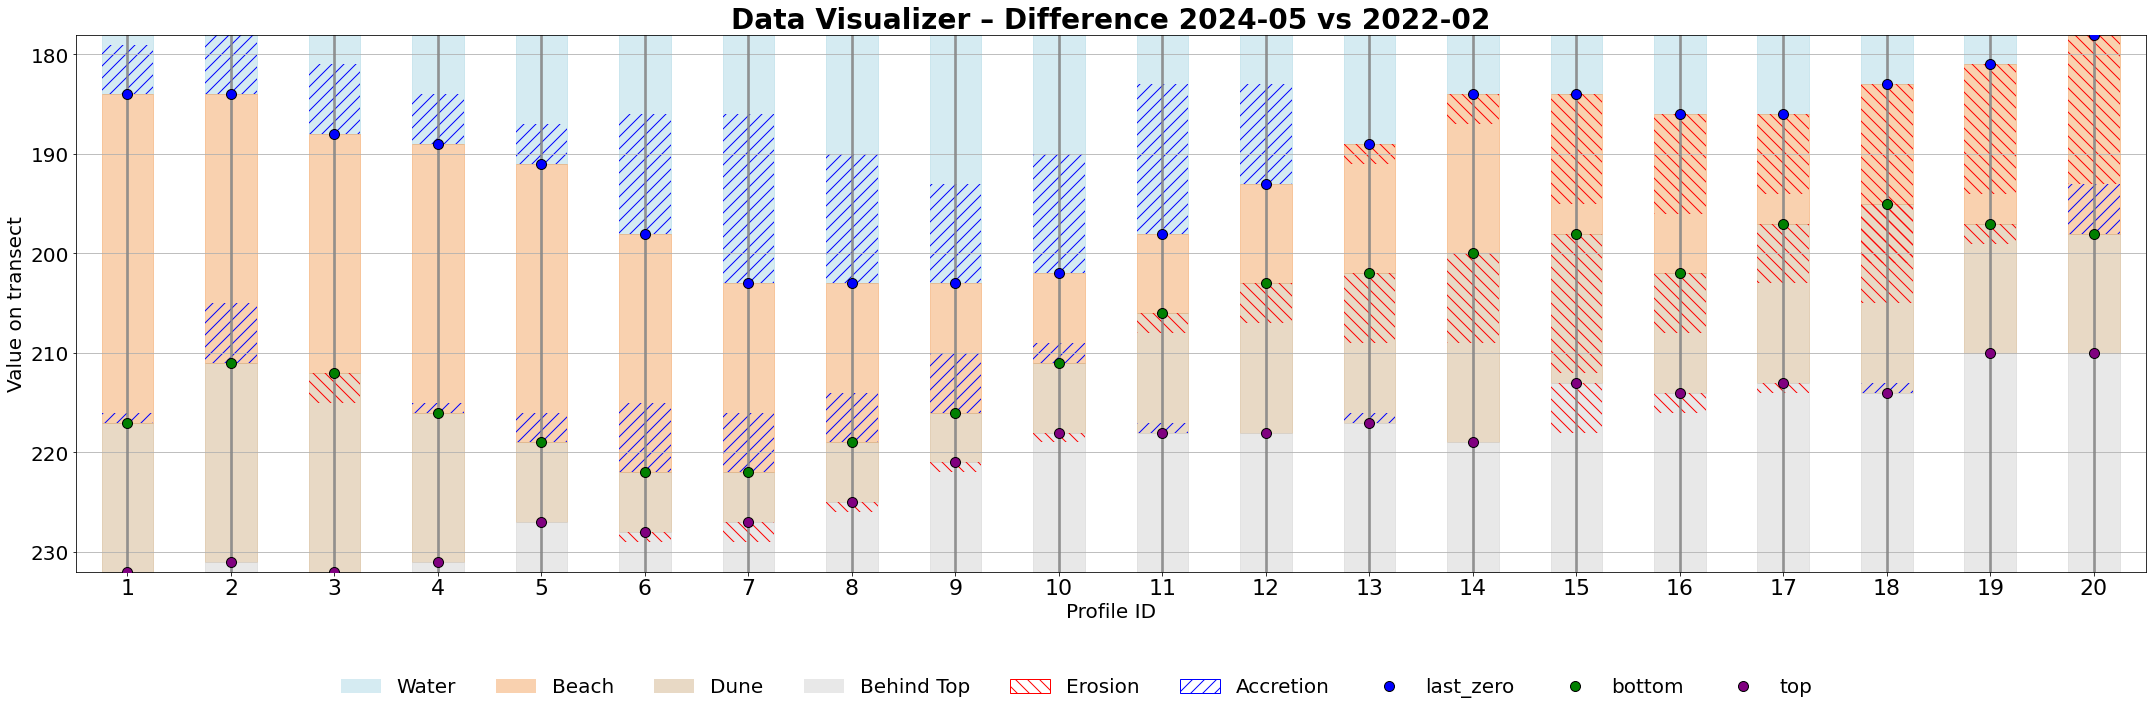

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import os

FOLDER_1 = '../demo/2024-05' #last period
FOLDER_2 = '../demo/2022-02' #first period
REFERENCE_FOLDER = FOLDER_2  #reference data visible on graph

OUTPUT_FOLDER = '../demo/data-visualiser'
CSV_PATH_1 = os.path.join(FOLDER_1, 'output', 'finder', 'finder.csv')
CSV_PATH_2 = os.path.join(FOLDER_2, 'output', 'finder', 'finder.csv')
OUTPUT_FILENAME = f"data-vis_diff_{os.path.basename(FOLDER_1)}_{os.path.basename(FOLDER_2)}.jpg"

data_1 = pd.read_csv(CSV_PATH_1)
data_2 = pd.read_csv(CSV_PATH_2)

if REFERENCE_FOLDER == FOLDER_1:
    base_data = data_1
    comp_data = data_2
else:
    base_data = data_2
    comp_data = data_1

common_profiles = sorted(set(base_data['profile_id']) & set(comp_data['profile_id']))
base_data = base_data[base_data['profile_id'].isin(common_profiles)].set_index('profile_id')
comp_data = comp_data[comp_data['profile_id'].isin(common_profiles)].set_index('profile_id')

fig, ax = plt.subplots(figsize=(30, 10))
spacing_factor = 0.5
bar_width = spacing_factor / 1
x_values = list(range(len(common_profiles)))

y_min = min(base_data[['last_zero', 'bottom', 'top']].min().min(),
            comp_data[['last_zero', 'bottom', 'top']].min().min())
y_max = max(base_data[['last_zero', 'bottom', 'top']].max().max(),
            comp_data[['last_zero', 'bottom', 'top']].max().max())

for i, profile_id in enumerate(common_profiles):
    x = x_values[i]
    base = base_data.loc[profile_id]
    comp = comp_data.loc[profile_id]

    lz_b, b_b, t_b = base['last_zero'], base['bottom'], base['top']
    lz_c, b_c, t_c = comp['last_zero'], comp['bottom'], comp['top']

    ax.fill_betweenx([y_min, lz_b], x - bar_width/2, x + bar_width/2, color='lightblue', alpha=0.5)
    ax.fill_betweenx([lz_b, b_b], x - bar_width/2, x + bar_width/2, color='#F4A460', alpha=0.5)
    ax.fill_betweenx([b_b, t_b], x - bar_width/2, x + bar_width/2, color='#D2B48C', alpha=0.5)
    ax.fill_betweenx([t_b, y_max], x - bar_width/2, x + bar_width/2, color='lightgrey', alpha=0.5)

    ax.plot([x, x], [y_min, y_max], color='gray', linestyle='-', linewidth=3, alpha=0.7)
    ax.scatter(x, lz_b, color='blue', edgecolor='black', s=100, zorder=3)
    ax.scatter(x, b_b, color='green', edgecolor='black', s=100, zorder=3)
    ax.scatter(x, t_b, color='purple', edgecolor='black', s=100, zorder=3)
    
    # Erosion
    if t_c > t_b:
        ax.fill_betweenx([t_c, t_b], x - bar_width/2, x + bar_width/2, hatch='\\\\', facecolor='none', edgecolor='red', linewidth=0.0)
    if b_c > b_b:
        ax.fill_betweenx([b_c, b_b], x - bar_width/2, x + bar_width/2, hatch='\\\\', facecolor='none', edgecolor='red', linewidth=0.0)
    if lz_c > lz_b:
        ax.fill_betweenx([lz_c, lz_b], x - bar_width/2, x + bar_width/2, hatch='\\\\', facecolor='none', edgecolor='red', linewidth=0.0)

    # Accretion 
    if t_c < t_b:
        ax.fill_betweenx([t_b, t_c], x - bar_width/2, x + bar_width/2, hatch='//', facecolor='none', edgecolor='blue', linewidth=0.0)
    if b_c < b_b:
        ax.fill_betweenx([b_b, b_c], x - bar_width/2, x + bar_width/2, hatch='//', facecolor='none', edgecolor='blue', linewidth=0.0)
    if lz_c < lz_b:
        ax.fill_betweenx([lz_b, lz_c], x - bar_width/2, x + bar_width/2, hatch='//', facecolor='none', edgecolor='blue', linewidth=0.0)

ax.set_xticks(x_values)
ax.set_xticklabels(common_profiles, rotation=0, ha='center', fontsize=22)
ax.set_xlabel('Profile ID', fontsize=20)
ax.set_ylabel('Value on transect', fontsize=20)
ax.set_title(f'Data Visualizer – Difference {os.path.basename(FOLDER_1)} vs {os.path.basename(FOLDER_2)}', fontsize=28, fontweight='bold')
ax.tick_params(axis='y', labelsize=20)
ax.set_ylim(y_min, y_max)
ax.set_xlim(min(x_values) - bar_width, max(x_values) + bar_width)
ax.invert_yaxis()
ax.grid(True)

legend_elements = [
    Patch(facecolor='lightblue', label='Water', alpha=0.5),
    Patch(facecolor='#F4A460', label='Beach', alpha=0.5),
    Patch(facecolor='#D2B48C', label='Dune', alpha=0.5),
    Patch(facecolor='lightgrey', label='Behind Top', alpha=0.5),
    Patch(facecolor='none', edgecolor='red', hatch='\\\\', label='Erosion'),
    Patch(facecolor='none', edgecolor='blue', hatch='//', label='Accretion'),
    plt.Line2D([0], [0], marker='o', color='w', label='last_zero', markerfacecolor='blue', markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='bottom', markerfacecolor='green', markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='top', markerfacecolor='purple', markersize=10, markeredgecolor='black')
]
fig.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, 0), ncol=9, fontsize=20, frameon=False)

plt.tight_layout()
plt.subplots_adjust(bottom=0.20)

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
output_path = os.path.join(OUTPUT_FOLDER, OUTPUT_FILENAME)
plt.savefig(output_path, dpi=150)
plt.show()


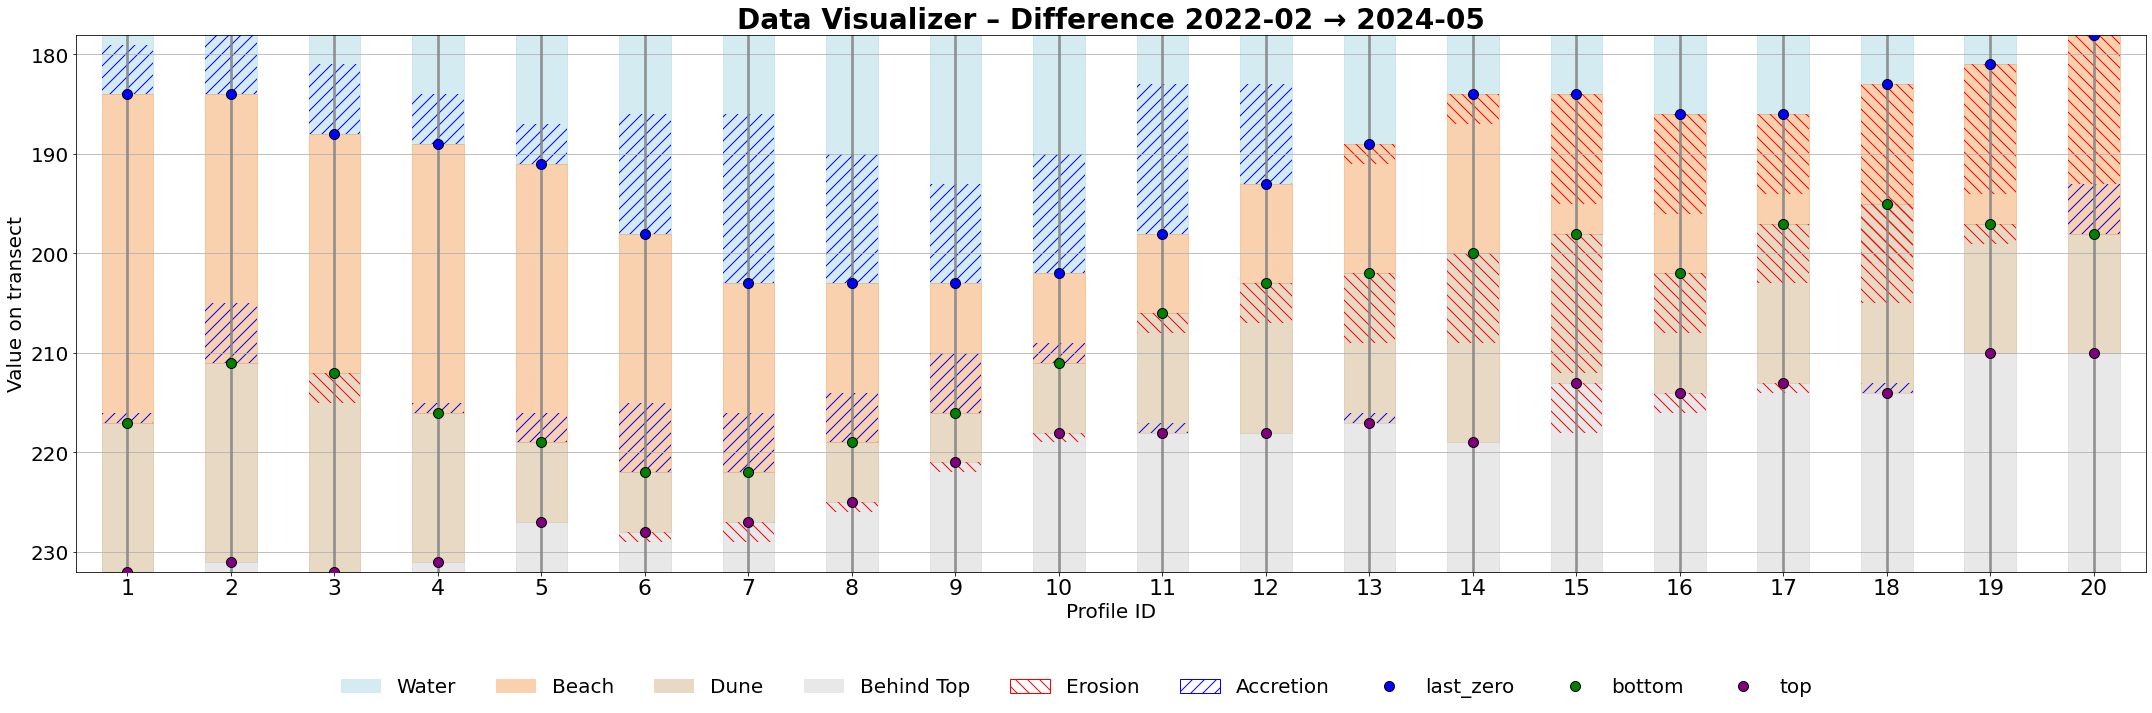

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import os

# --- path ---
FOLDER_1 = '../demo/2024-05'  # Last period
FOLDER_2 = '../demo/2022-02'  # Old period
REFERENCE_FOLDER = FOLDER_2   # Reference data (it will be visible in background)

OUTPUT_FOLDER = '../demo/data-visualiser'
CSV_PATH_1 = os.path.join(FOLDER_1, 'output', 'finder', 'finder.csv')
CSV_PATH_2 = os.path.join(FOLDER_2, 'output', 'finder', 'finder.csv')
OUTPUT_FILENAME = f"data-vis_diff_{os.path.basename(FOLDER_1)}_{os.path.basename(FOLDER_2)}.jpg"

# --- data ---
data_1 = pd.read_csv(CSV_PATH_1)
data_2 = pd.read_csv(CSV_PATH_2)

if REFERENCE_FOLDER == FOLDER_1:
    base_data = data_1
else:
    base_data = data_2

common_profiles = sorted(set(data_1['profile_id']) & set(data_2['profile_id']))
base_data = base_data[base_data['profile_id'].isin(common_profiles)].set_index('profile_id')
future_data = data_1[data_1['profile_id'].isin(common_profiles)].set_index('profile_id')
past_data = data_2[data_2['profile_id'].isin(common_profiles)].set_index('profile_id')

# --- Plot ---
fig, ax = plt.subplots(figsize=(30, 10))
spacing_factor = 0.5
bar_width = spacing_factor
x_values = list(range(len(common_profiles)))

y_min = min(future_data[['last_zero', 'bottom', 'top']].min().min(),
            past_data[['last_zero', 'bottom', 'top']].min().min())
y_max = max(future_data[['last_zero', 'bottom', 'top']].max().max(),
            past_data[['last_zero', 'bottom', 'top']].max().max())

for i, profile_id in enumerate(common_profiles):
    x = x_values[i]
    ref = base_data.loc[profile_id]
    lz_b, b_b, t_b = ref['last_zero'], ref['bottom'], ref['top']

    past = past_data.loc[profile_id]
    future = future_data.loc[profile_id]
    lz_p, b_p, t_p = past['last_zero'], past['bottom'], past['top']
    lz_f, b_f, t_f = future['last_zero'], future['bottom'], future['top']

    # Background
    ax.fill_betweenx([y_min, lz_b], x - bar_width/2, x + bar_width/2, color='lightblue', alpha=0.5)
    ax.fill_betweenx([lz_b, b_b], x - bar_width/2, x + bar_width/2, color='#F4A460', alpha=0.5)
    ax.fill_betweenx([b_b, t_b], x - bar_width/2, x + bar_width/2, color='#D2B48C', alpha=0.5)
    ax.fill_betweenx([t_b, y_max], x - bar_width/2, x + bar_width/2, color='lightgrey', alpha=0.5)

    # Lines and points
    ax.plot([x, x], [y_min, y_max], color='gray', linestyle='-', linewidth=3, alpha=0.7)
    ax.scatter(x, lz_b, color='blue', edgecolor='black', s=100, zorder=3)
    ax.scatter(x, b_b, color='green', edgecolor='black', s=100, zorder=3)
    ax.scatter(x, t_b, color='purple', edgecolor='black', s=100, zorder=3)

    # Erosion
    if t_f > t_p:
        ax.fill_betweenx([t_f, t_p], x - bar_width/2, x + bar_width/2,
                         hatch='\\\\', facecolor='none', edgecolor='red', linewidth=0.0)
    if b_f > b_p:
        ax.fill_betweenx([b_f, b_p], x - bar_width/2, x + bar_width/2,
                         hatch='\\\\', facecolor='none', edgecolor='red', linewidth=0.0)
    if lz_f > lz_p:
        ax.fill_betweenx([lz_f, lz_p], x - bar_width/2, x + bar_width/2,
                         hatch='\\\\', facecolor='none', edgecolor='red', linewidth=0.0)

    # Accretion
    if t_f < t_p:
        ax.fill_betweenx([t_p, t_f], x - bar_width/2, x + bar_width/2,
                         hatch='//', facecolor='none', edgecolor='blue', linewidth=0.0)
    if b_f < b_p:
        ax.fill_betweenx([b_p, b_f], x - bar_width/2, x + bar_width/2,
                         hatch='//', facecolor='none', edgecolor='blue', linewidth=0.0)
    if lz_f < lz_p:
        ax.fill_betweenx([lz_p, lz_f], x - bar_width/2, x + bar_width/2,
                         hatch='//', facecolor='none', edgecolor='blue', linewidth=0.0)

ax.set_xticks(x_values)
ax.set_xticklabels(common_profiles, fontsize=22)
ax.set_xlabel('Profile ID', fontsize=20)
ax.set_ylabel('Value on transect', fontsize=20)
ax.set_title(f'Data Visualizer – Difference {os.path.basename(FOLDER_2)} → {os.path.basename(FOLDER_1)}', fontsize=28, fontweight='bold')
ax.tick_params(axis='y', labelsize=20)
ax.set_ylim(y_min, y_max)
ax.set_xlim(min(x_values) - bar_width, max(x_values) + bar_width)
ax.invert_yaxis()
ax.grid(True)

legend_elements = [
    Patch(facecolor='lightblue', label='Water', alpha=0.5),
    Patch(facecolor='#F4A460', label='Beach', alpha=0.5),
    Patch(facecolor='#D2B48C', label='Dune', alpha=0.5),
    Patch(facecolor='lightgrey', label='Behind Top', alpha=0.5),
    Patch(facecolor='none', edgecolor='red', hatch='\\\\', label='Erosion'),
    Patch(facecolor='none', edgecolor='blue', hatch='//', label='Accretion'),
    plt.Line2D([0], [0], marker='o', color='w', label='last_zero', markerfacecolor='blue', markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='bottom', markerfacecolor='green', markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='top', markerfacecolor='purple', markersize=10, markeredgecolor='black')
]
fig.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, 0), ncol=9, fontsize=20, frameon=False)

plt.tight_layout()
plt.subplots_adjust(bottom=0.20)

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
output_path = os.path.join(OUTPUT_FOLDER, OUTPUT_FILENAME)
plt.savefig(output_path, dpi=150)
plt.show()
